<a href="https://colab.research.google.com/github/srikrishnapriyad/ml_diabetes_project/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

data = pd.read_csv("diabetic_data.csv")

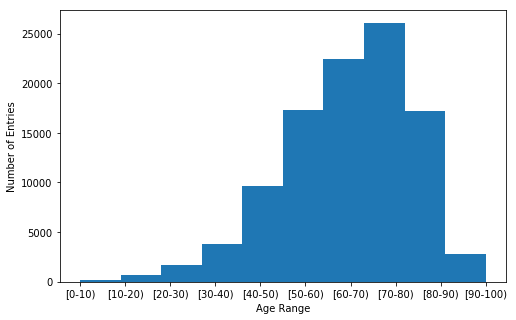

In [10]:
## Histogram of Ages
plt.figure(figsize=(8,5))
plt.hist(data["age"])
plt.ylabel("Number of Entries")
plt.xlabel("Age Range")
plt.legend()
plt.show();

# PCA

Re-mapped values
- Drugs [No:4, Steady:3, Down:2, Up:1]
- Gender [Male:0, Female:1]
- Race [?:0, AfricanAmerican:1, Asian:2, Caucasian:3, Hispanic:4, Other:5]
- Age [Map to lower bound 0-10 -> 0, 30-40 -> 30]
- Max_glu_serum [>200:200, >300:300, 

In [35]:
x = data.copy(deep=True)
drop_features = ['encounter_id', 'patient_nbr', 'weight', 
                 'payer_code', 'medical_specialty']

# Drop features to be ignored
x = x.drop(drop_features, axis=1)
# Store Target values
y = pd.Series(None)

# Create encoder
encoder = preprocessing.LabelEncoder()

# Encode each feature
for feature in x.columns:
    if feature == "A1Cresult":
        y = encoder.fit_transform(x[feature])
    else:
        x[feature] = encoder.fit_transform(x[feature])

In [36]:
print(x.head())

   race  gender  age  admission_type_id  discharge_disposition_id  \
0     3       0    0                  5                        23   
1     3       0    1                  0                         0   
2     1       0    2                  0                         0   
3     3       1    3                  0                         0   
4     3       1    4                  0                         0   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    0                 0                  40               0   
1                    6                 2                  58               0   
2                    6                 1                  10               5   
3                    6                 1                  43               1   
4                    6                 0                  50               0   

   num_medications     ...      citoglipton  insulin  glyburide-metformin  \
0                0     ... 